In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import sys

if ".." not in sys.path:
    sys.path.append("..")

from utils.const import INTEREST_VARS

from utils.plotting import (
    box_plot,
    hist_plot,
    plot_series,
)

In [2]:
def describe_variables(
    df: pd.DataFrame,
    interest_variables: list[str] | None = None,
) -> pd.DataFrame:
    if interest_variables:
        df = df[interest_variables]

    info = (
        df.drop(columns=["date"])
        .describe()
        .rename(
            index={
                "mean": "Media",
                "25%": "Q1",
                "75%": "Q3",
                "50%": "Mediana",
                "max": "Max",
                "min": "Min",
                "std": "Desv. Éstandar",
            }
        )
        .drop(index=["count"])
    )

    info.loc["Varianza"] = info.loc["Desv. Éstandar"] ** 2
    info.loc["Rango"] = info.loc["Max"] - info.loc["Min"]

    return info.apply(lambda var: var.round(2))

In [57]:
def filter_final_data(df: pd.DataFrame) -> pd.DataFrame:
    df["month"] = df["date"].dt.month

    oct_ = df["month"] == 10
    nov_ = df["month"] == 11
    dec_ = df["month"] == 12

    df = df[oct_ | nov_ | dec_].drop("month", axis=1)
    df = df.groupby(pd.Grouper(key="date", freq="D")).mean().reset_index()
    return df

In [58]:
norte2 = filter_final_data(
    pd.read_csv("../non_atypical_datasets/NORTE2_2021_2023.csv", parse_dates=["date"])
)
noroeste2 = filter_final_data(
    pd.read_csv(
        "../non_atypical_datasets/NOROESTE2_2021_2023.csv", parse_dates=["date"]
    )
)
sureste3 = filter_final_data(
    pd.read_csv("../non_atypical_datasets/SURESTE3_2021_2023.csv", parse_dates=["date"])
)

sureste3

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2021-10-01,1.047708,4.722917,7.443750,12.018750,27.208333,39.604167,10.583333,730.381250,0.000417,72.416667,3.866667,0.095062,25.330208,6.731250,178.062500
1,2021-10-02,1.015000,3.937500,6.325000,10.120833,24.958333,36.166667,11.479167,732.087500,0.000000,71.958333,9.662500,0.170833,25.674167,6.491667,137.000000
2,2021-10-03,1.026250,4.304167,6.191667,10.354167,22.333333,33.333333,8.000000,732.245833,0.000000,70.125000,6.818750,0.147417,25.873750,6.283333,183.333333
3,2021-10-04,1.091667,7.825000,9.275000,16.941667,17.125000,58.750000,10.958333,732.666667,0.000000,69.541667,5.952083,0.103250,25.355417,6.141667,192.791667
4,2021-10-05,1.126250,4.200000,10.387500,14.425000,34.125000,41.625000,11.833333,733.100000,0.000000,55.125000,8.975000,0.152417,25.978750,6.575000,156.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2022-12-27,1.660000,19.583333,22.375000,41.750000,18.208333,96.875000,20.000000,738.208333,0.000000,43.458333,5.562500,0.135500,13.137917,5.366667,175.791667
453,2022-12-28,1.767500,35.341667,26.045833,61.204167,18.000000,140.416667,26.666667,729.987500,0.000000,52.625000,4.800000,0.135583,16.399167,5.495833,191.625000
454,2022-12-29,1.830417,29.995833,26.250000,56.083333,10.791667,141.833333,26.125000,729.441667,0.000000,49.000000,4.266667,0.092333,19.295417,6.079167,260.458333
455,2022-12-30,1.728333,22.129167,24.241667,46.187500,15.625000,121.041667,24.500000,731.395833,0.000000,52.583333,8.137500,0.098333,18.717083,5.729167,203.041667


In [64]:
def data_exploration(df: pd.DataFrame, zone: str):
    box_plot(
        df,
        interest_vars=INTEREST_VARS,
        title=f"Medidas de posición no-central\n{zone}",
    )
    hist_plot(
        df,
        interest_vars=INTEREST_VARS,
        title=f"Distribución de Datos\n{zone}",
    )
    correlation_matrix = df[INTEREST_VARS].drop(columns="date").corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        linewidths=0.5,
        annot_kws={"size": 12},
        mask=mask,
        vmin=-1,
        vmax=1,
    )

    info = describe_variables(
        df,
        interest_variables=INTEREST_VARS,
    )

    return info

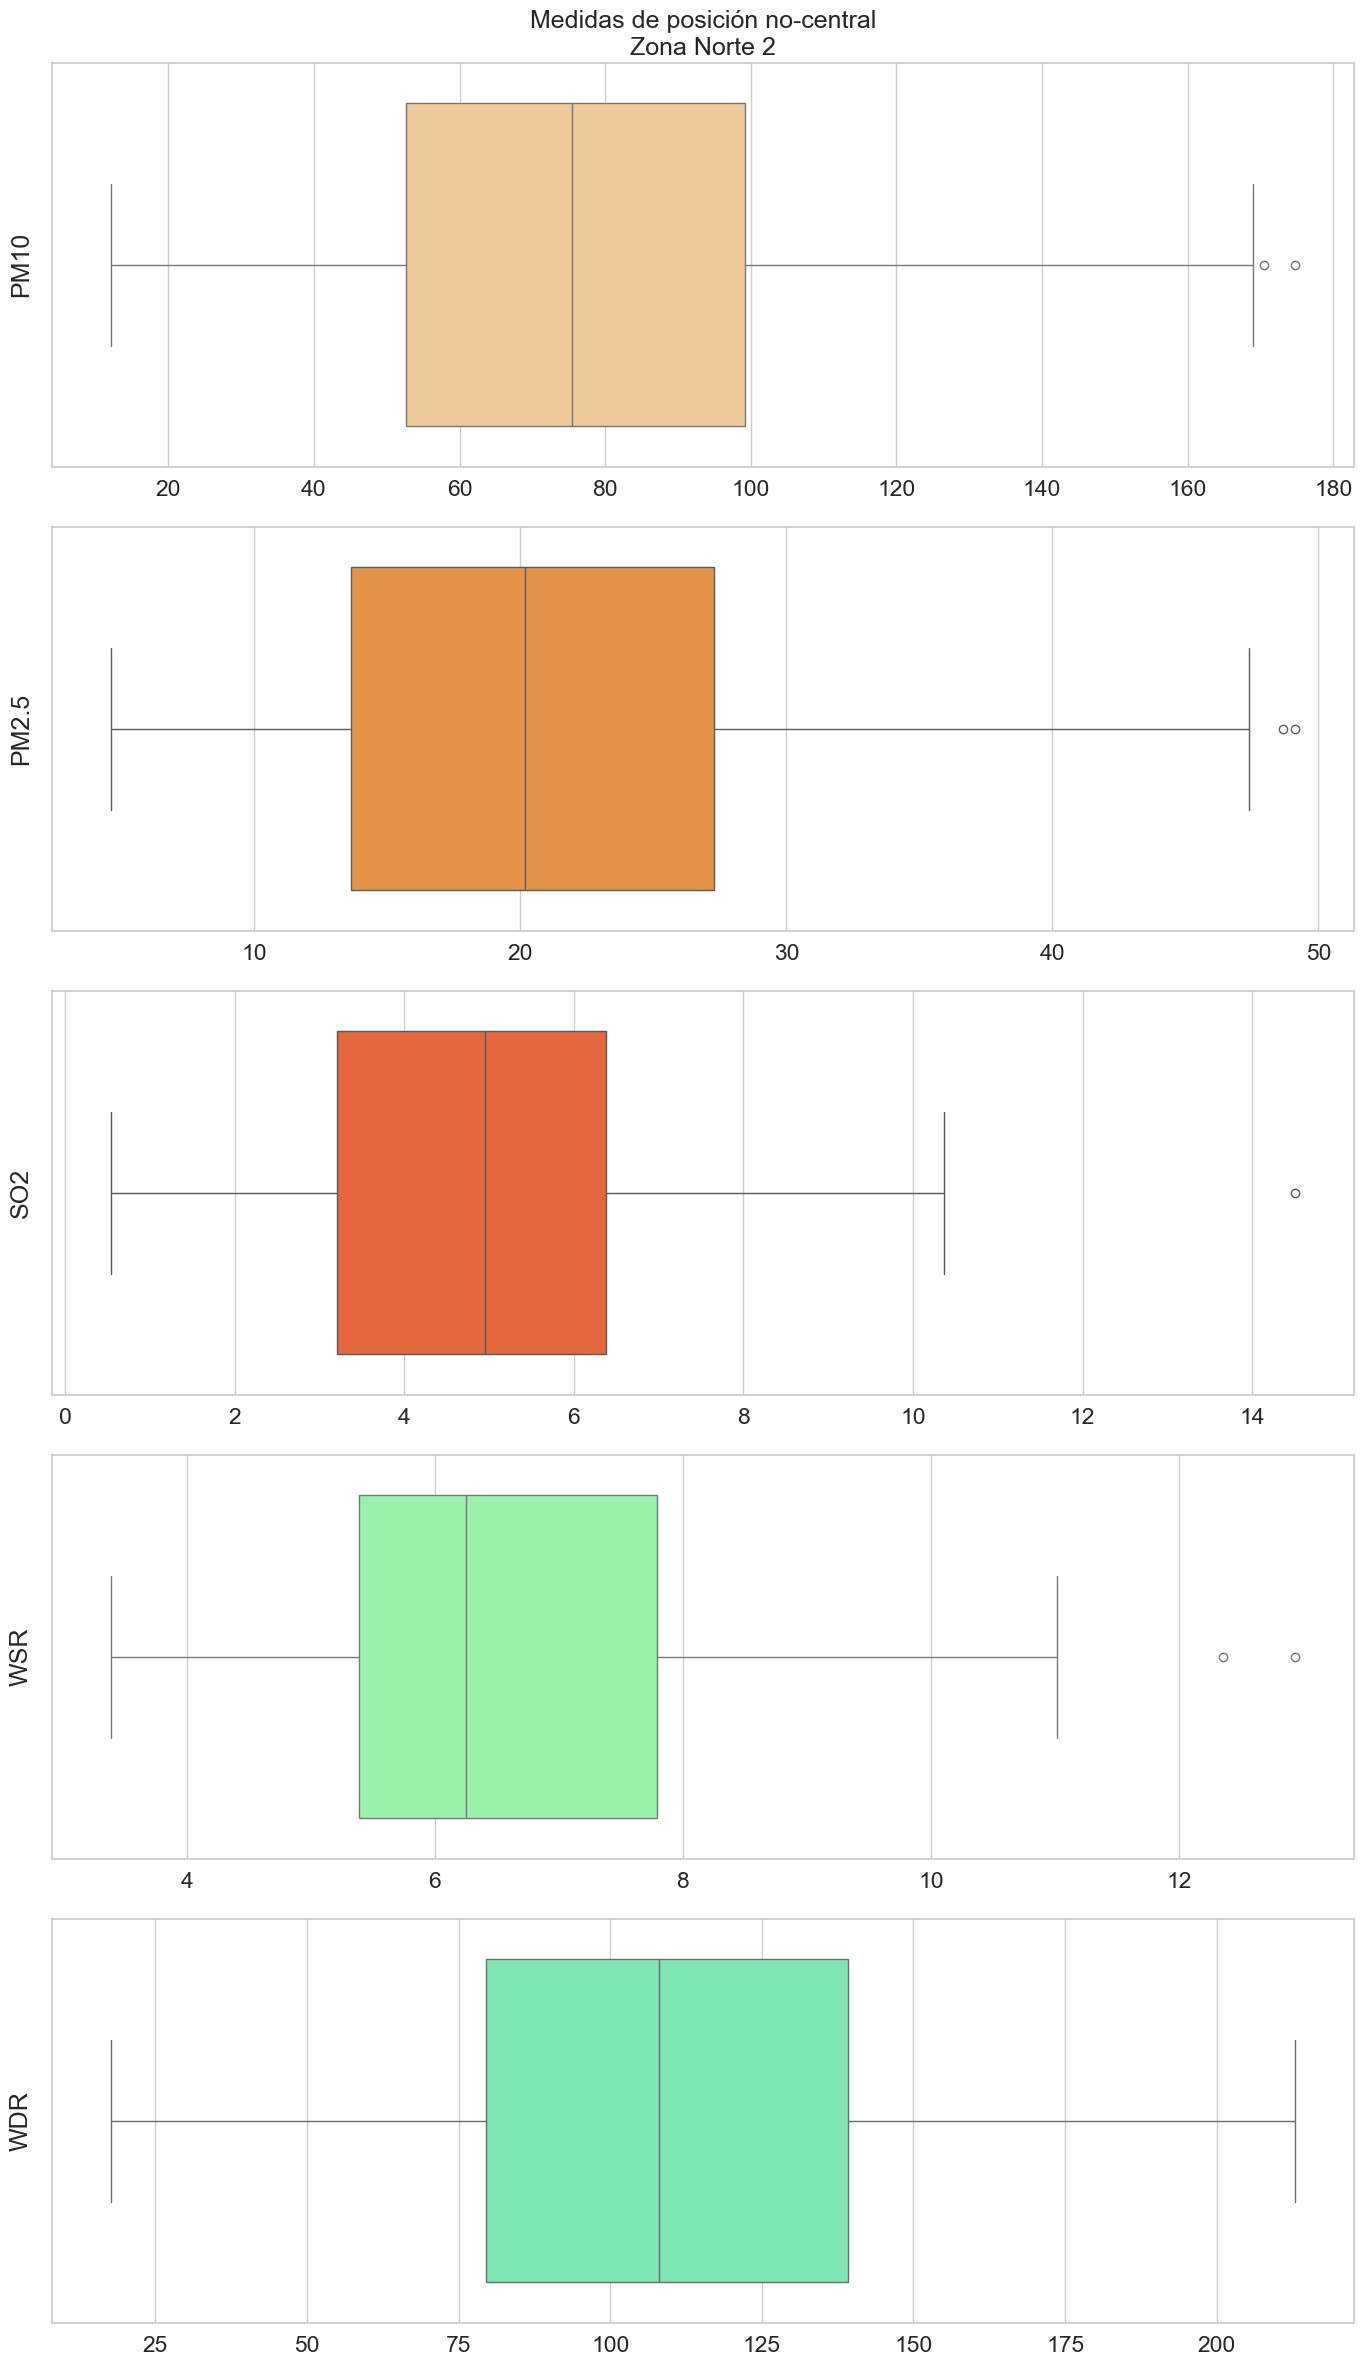

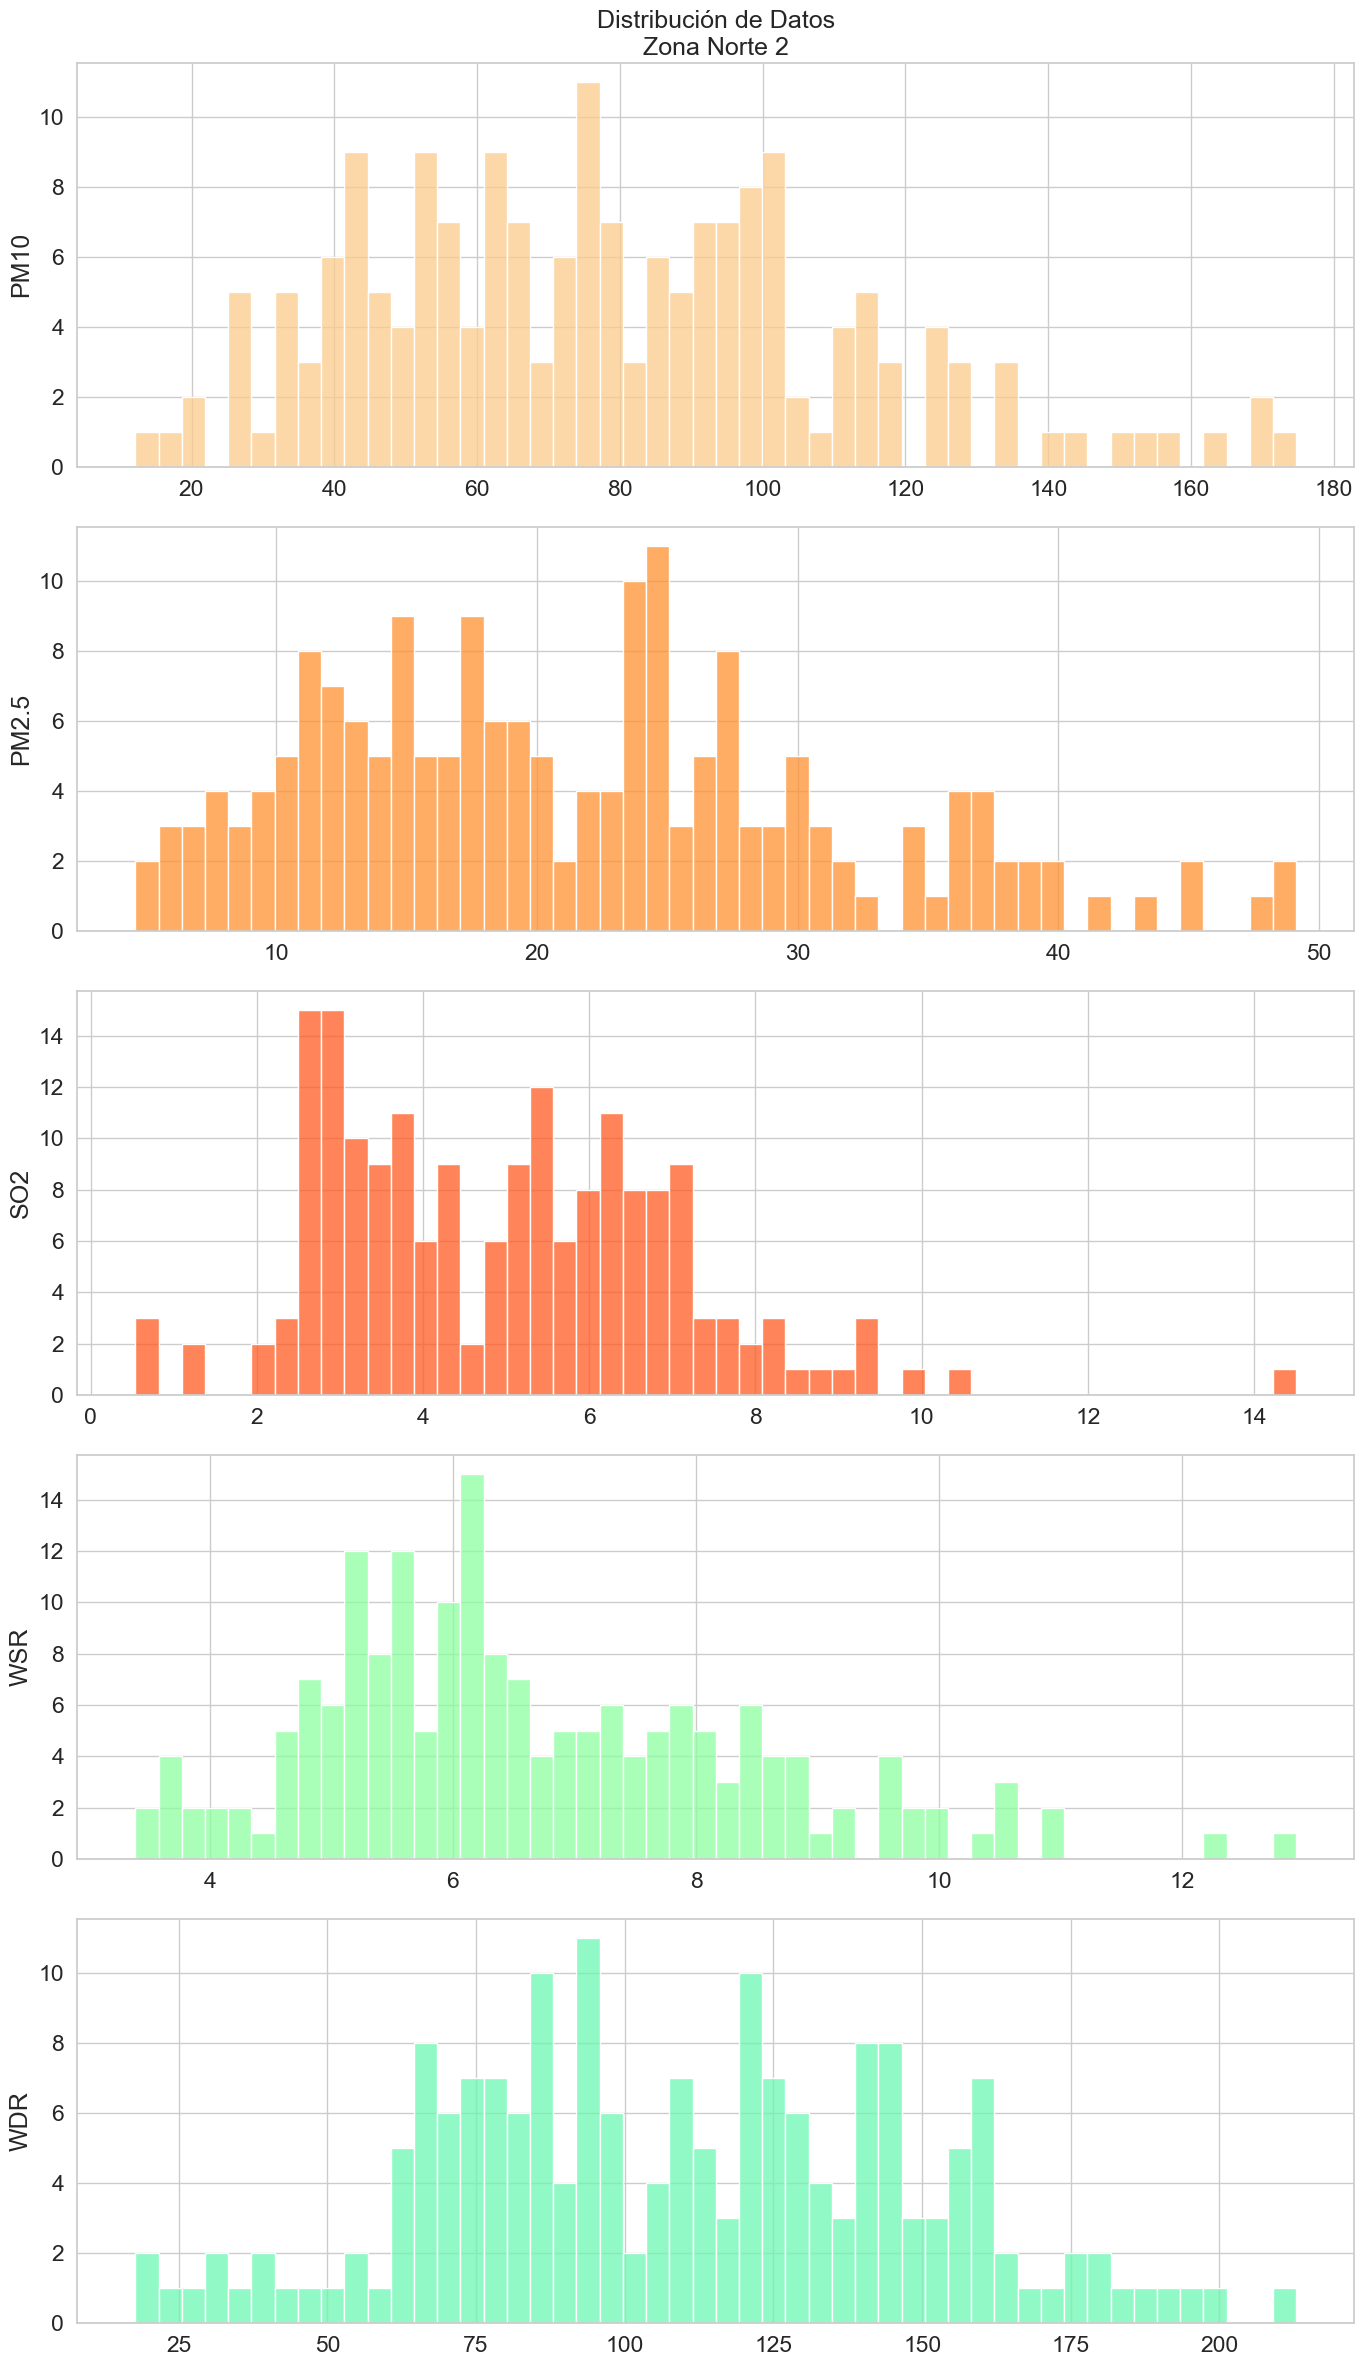

,PM10,PM2.5,SO2,WSR,WDR
Media,77.77,21.45,4.96,6.66,108.71
Desv. Éstandar,33.17,9.89,2.08,1.78,39.55
Min,12.12,4.60,0.54,3.39,17.71
Q1,52.62,13.65,3.20,5.38,79.50
Mediana,75.42,20.19,4.95,6.25,108.03
Q3,99.18,27.29,6.38,7.79,139.12
Max,174.75,49.12,14.51,12.94,212.92
Varianza,1100.10,97.73,4.34,3.16,1564.12
Rango,162.62,44.52,13.97,9.55,195.21


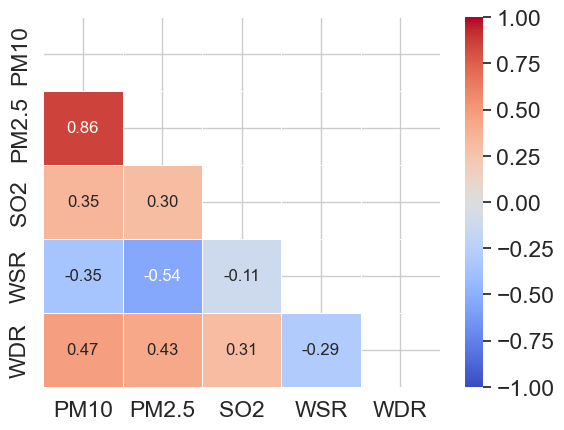

In [65]:
data_exploration(norte2, "Zona Norte 2")

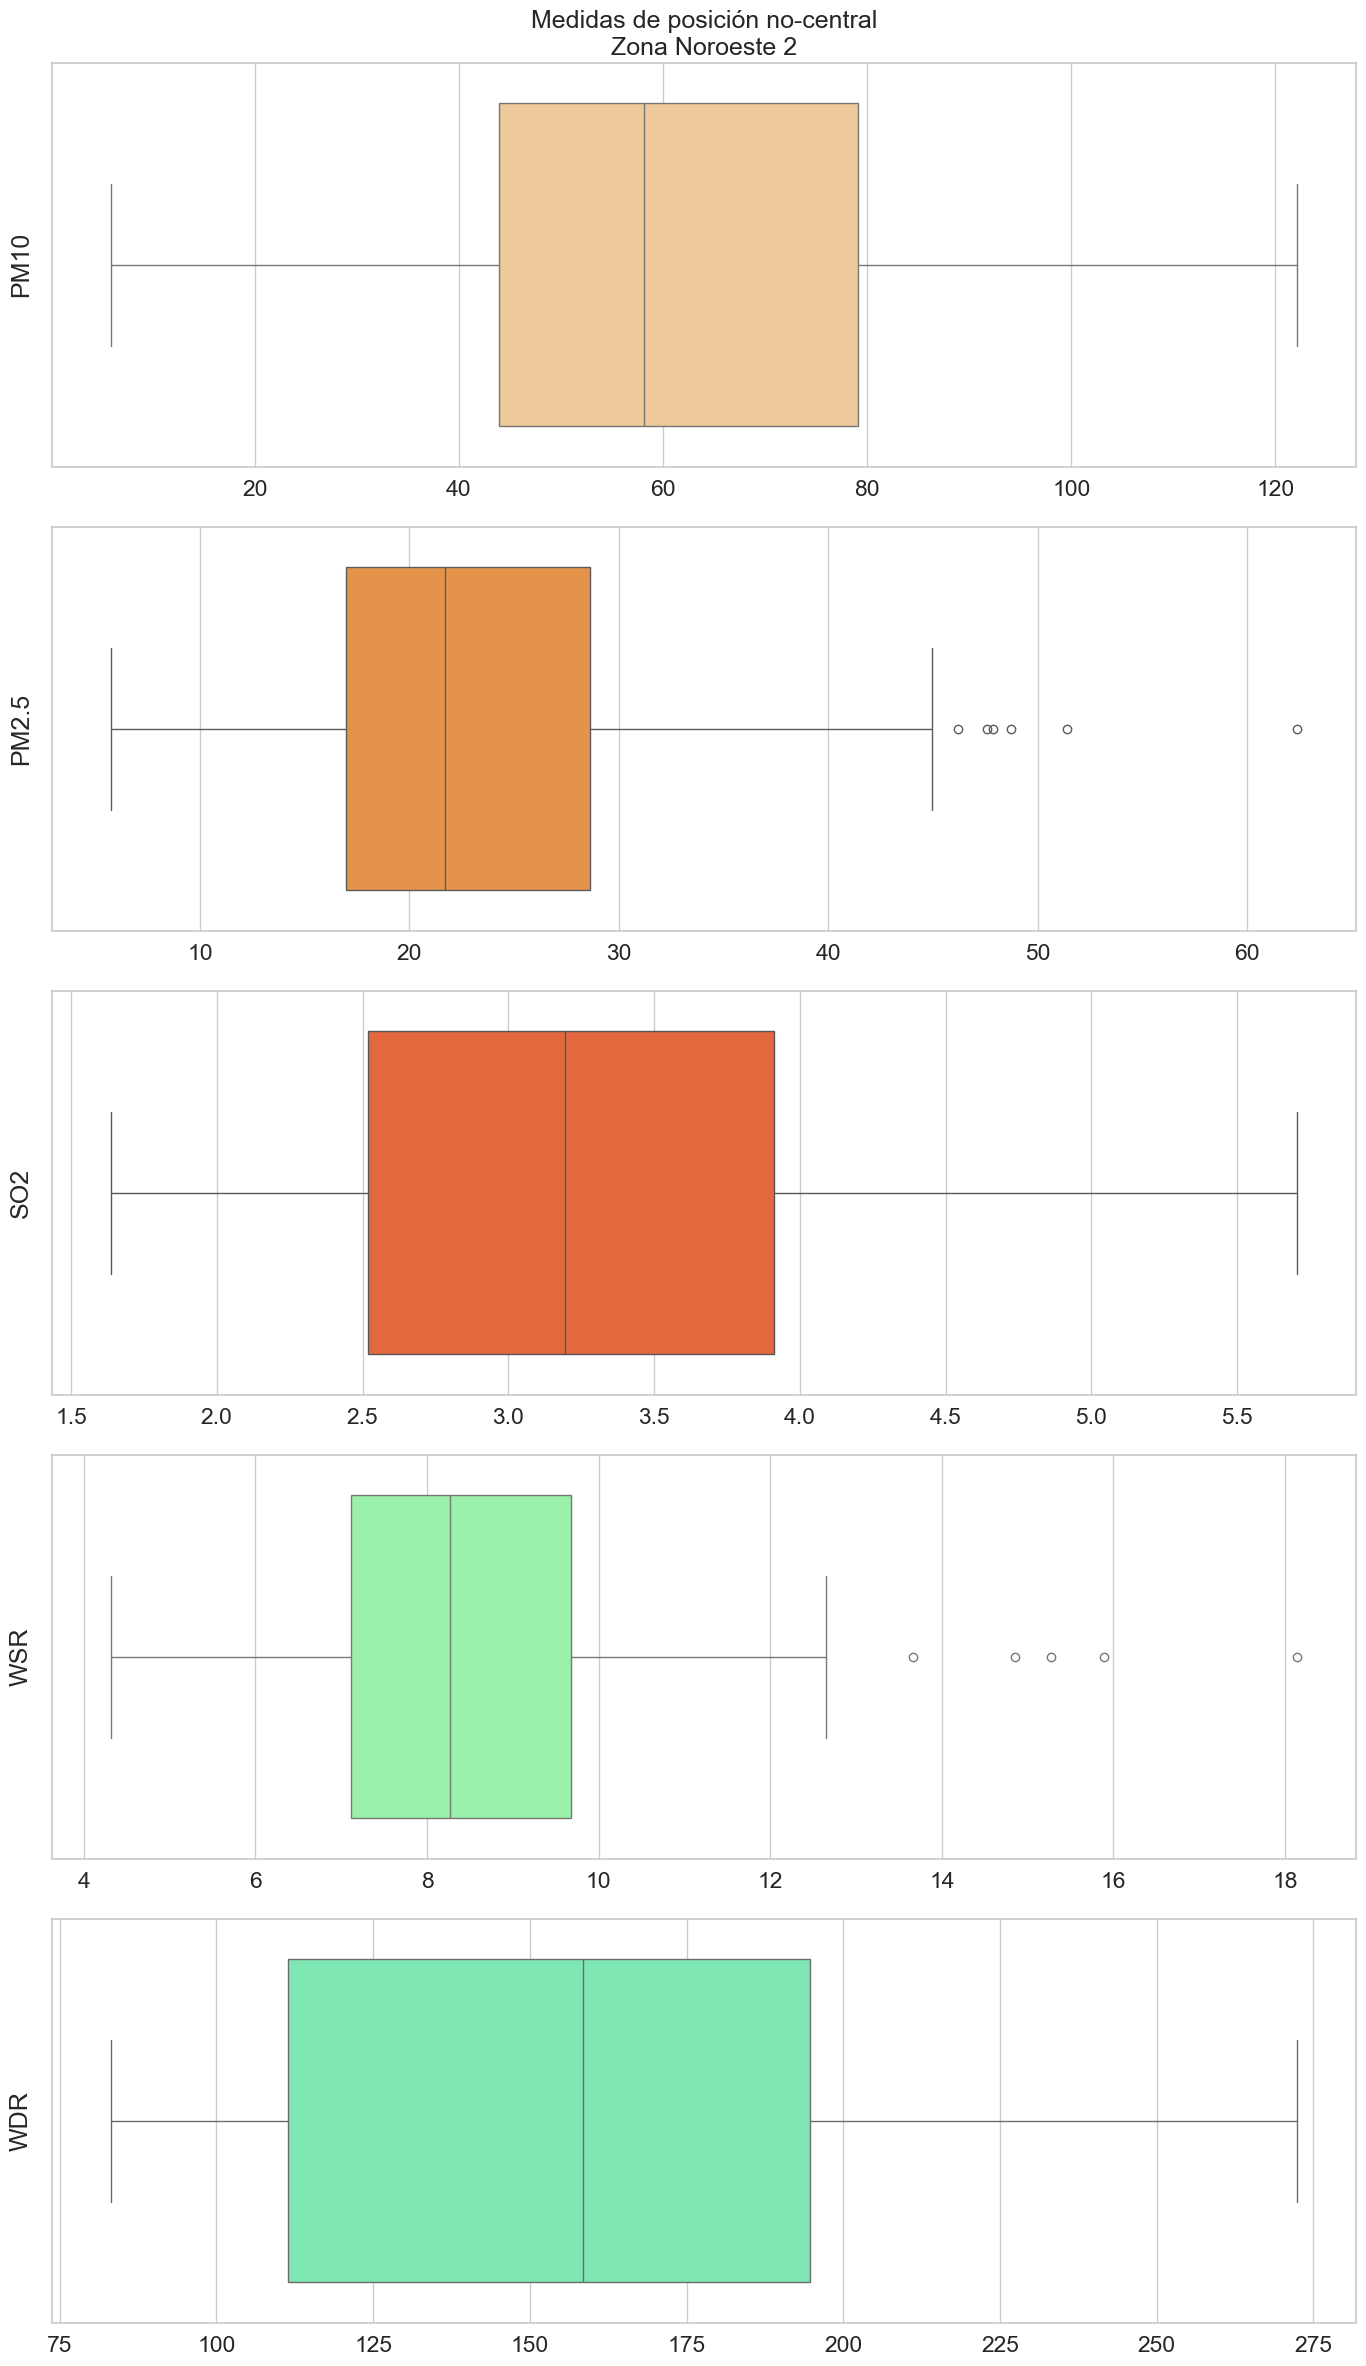

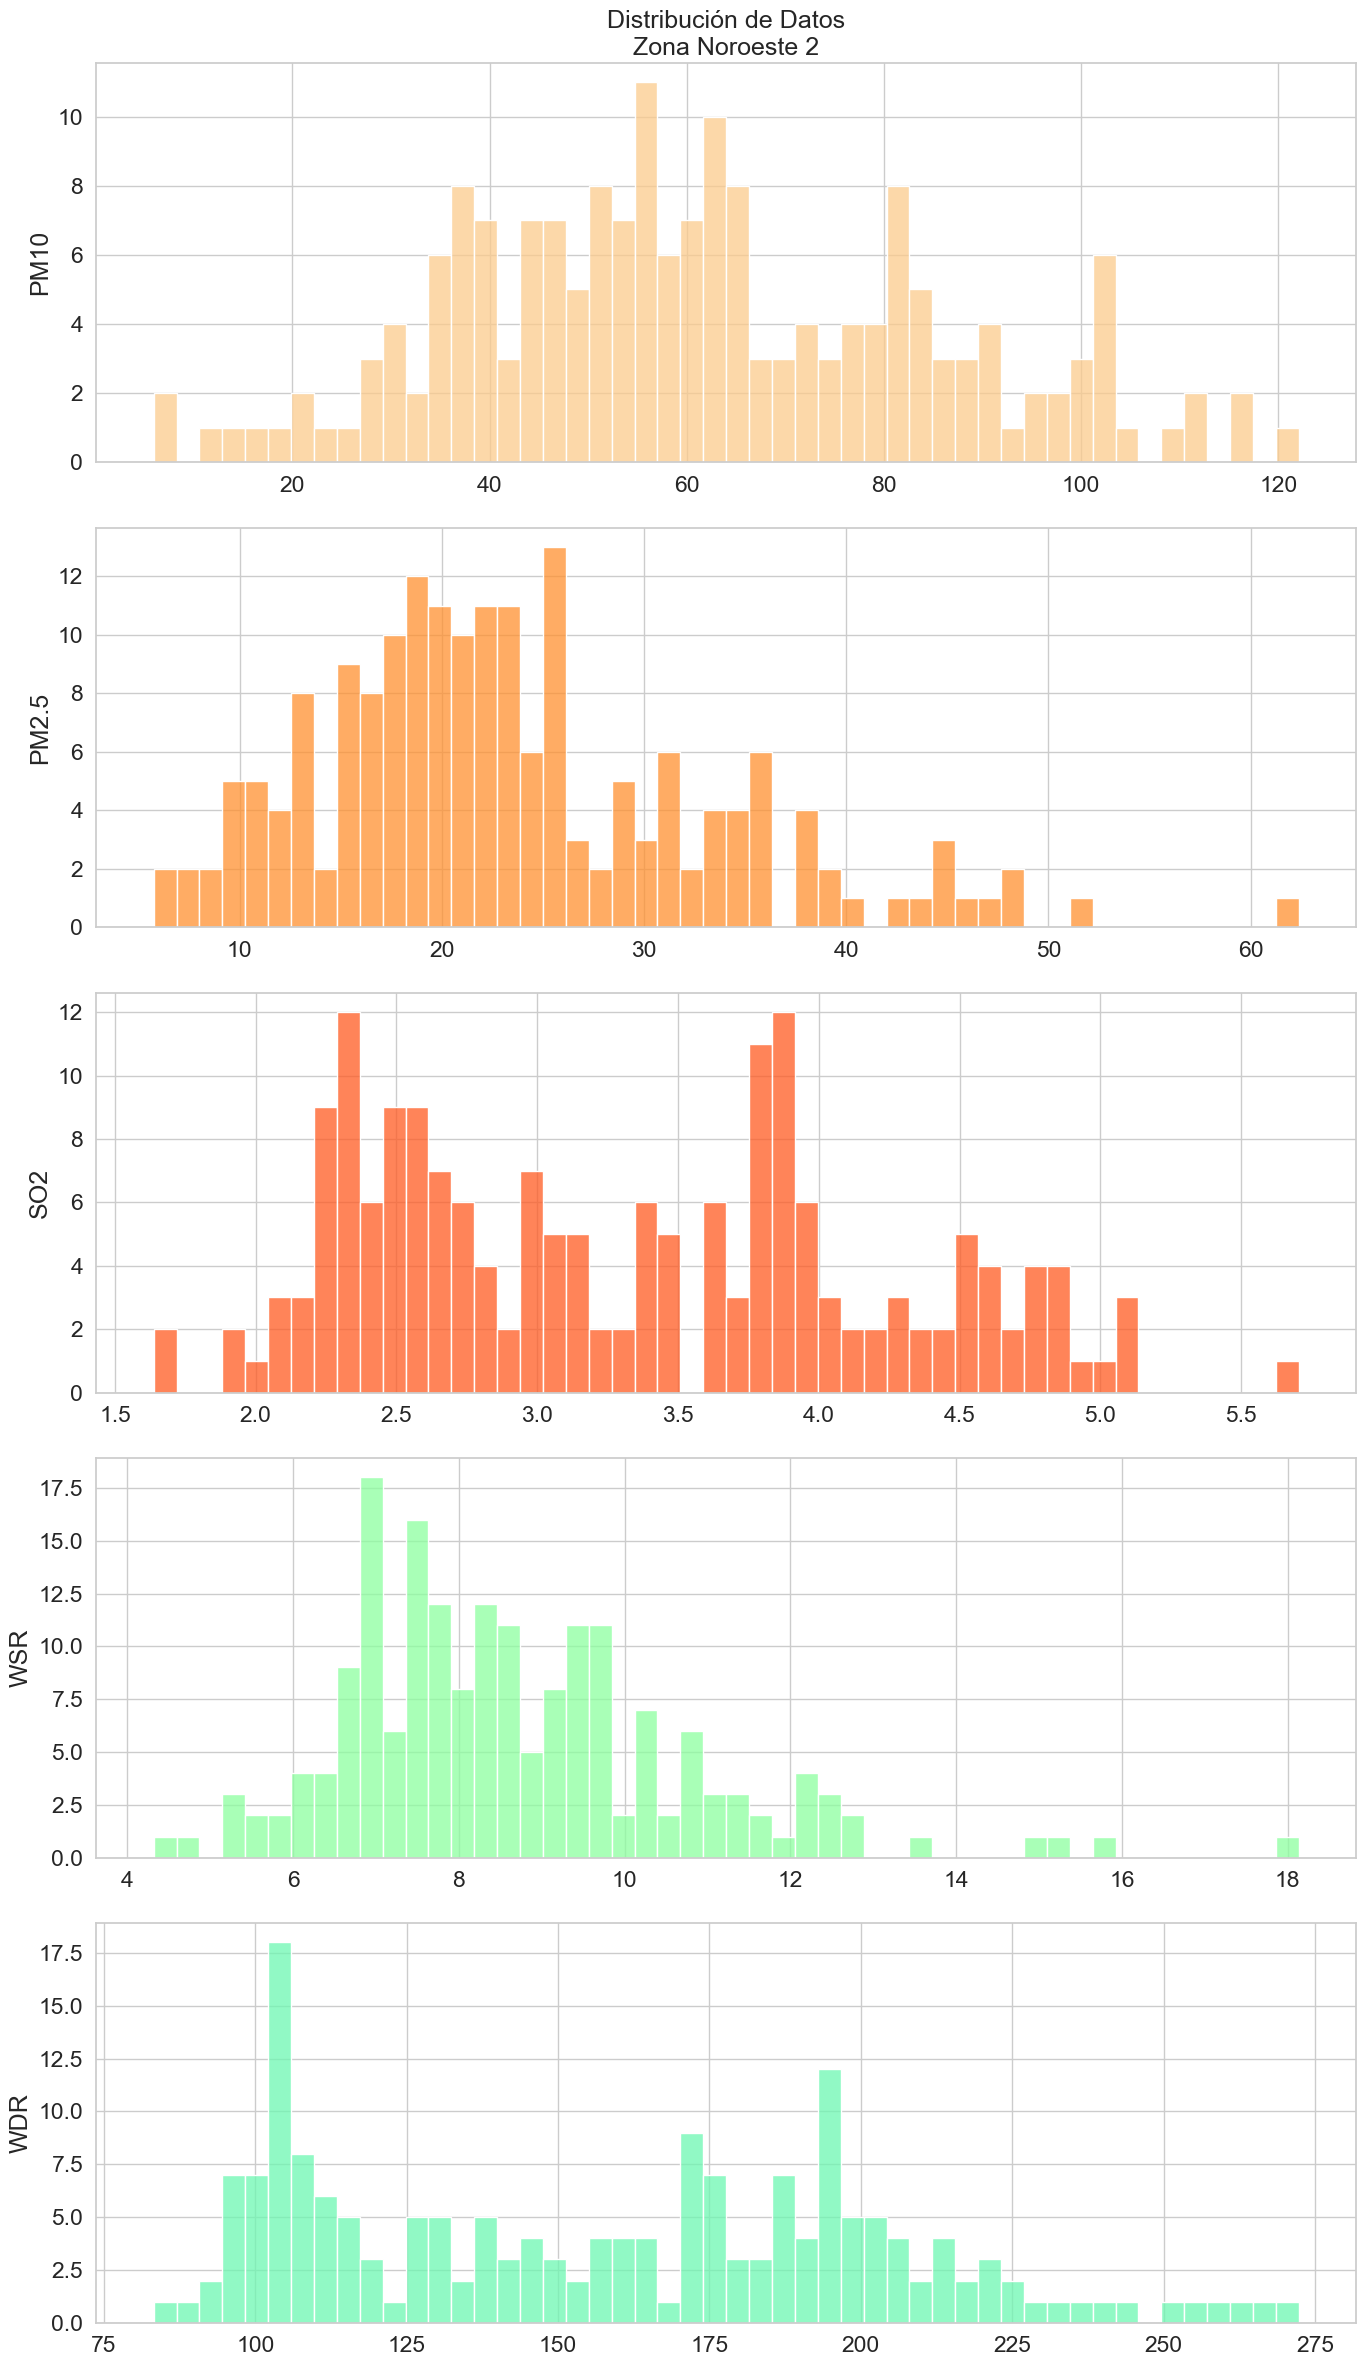

,PM10,PM2.5,SO2,WSR,WDR
Media,61.08,23.42,3.31,8.67,157.40
Desv. Éstandar,23.91,9.88,0.88,2.09,45.87
Min,5.92,5.75,1.64,4.32,83.21
Q1,43.94,16.96,2.52,7.12,111.42
Mediana,58.15,21.70,3.19,8.27,158.52
Q3,79.12,28.64,3.91,9.67,194.71
Max,122.08,62.38,5.70,18.14,272.33
Varianza,571.61,97.65,0.78,4.39,2104.49
Rango,116.17,56.63,4.07,13.82,189.12


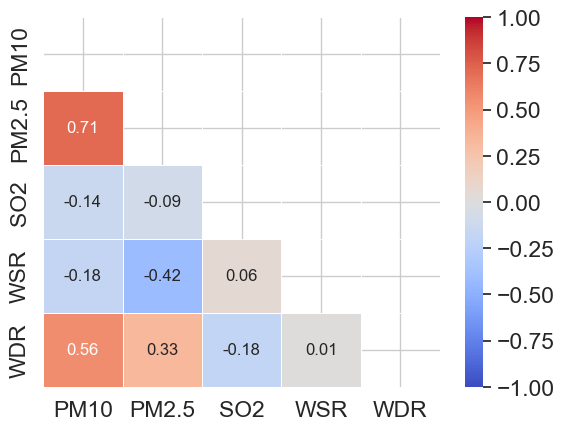

In [66]:
data_exploration(noroeste2, "Zona Noroeste 2")

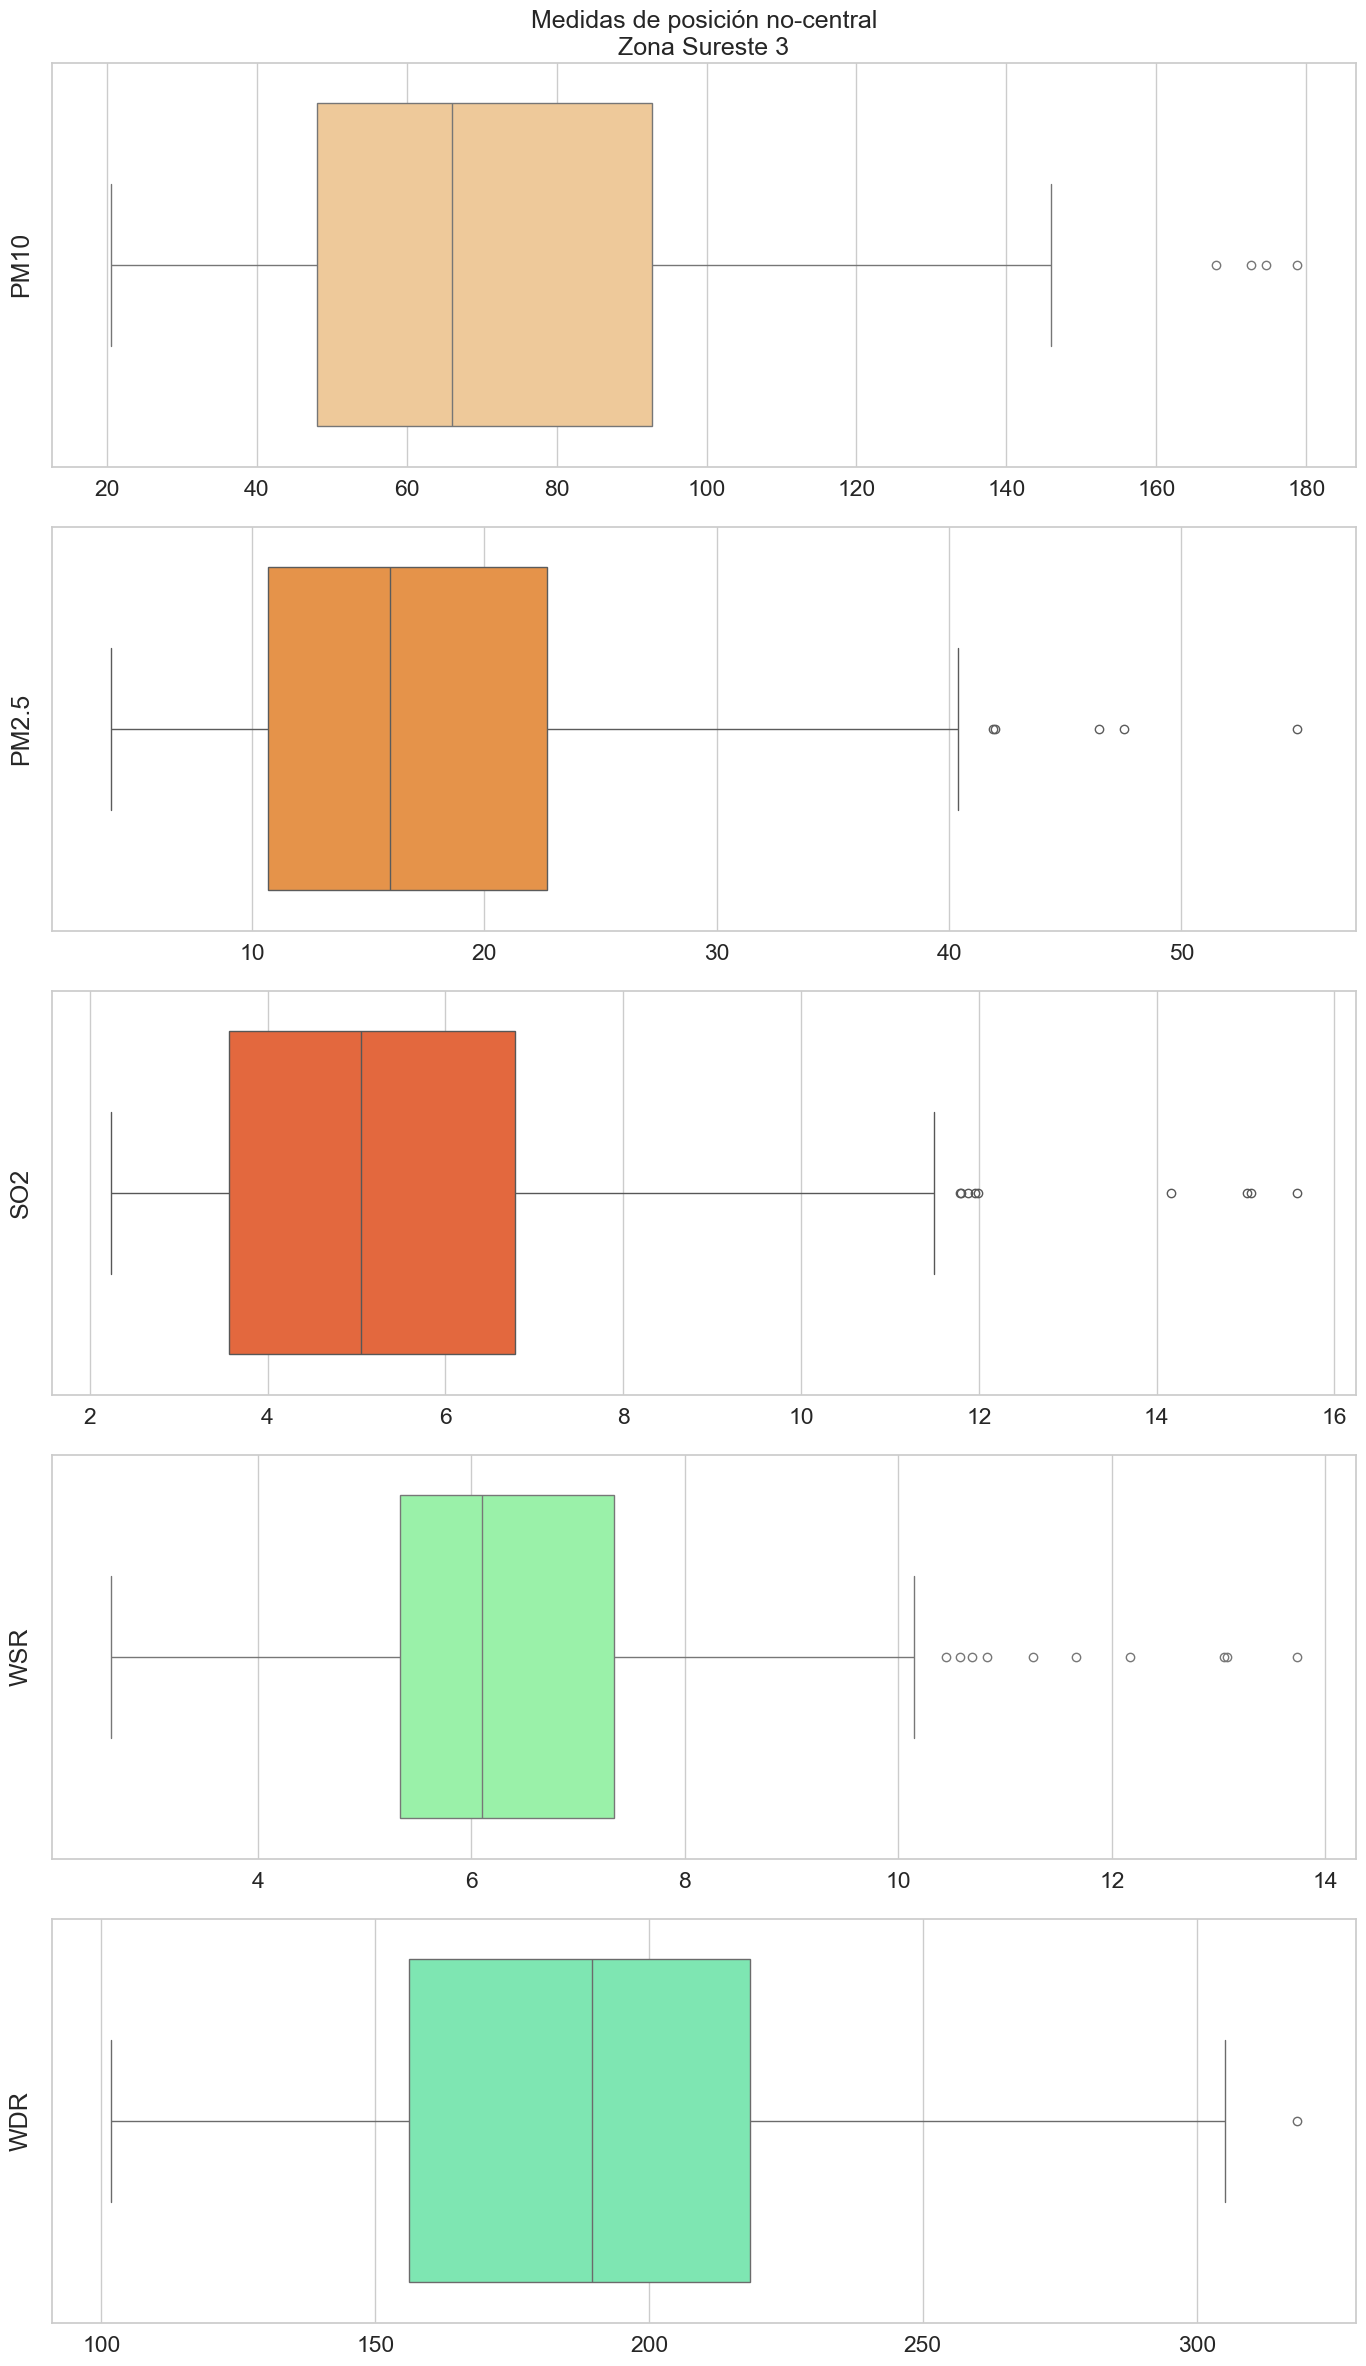

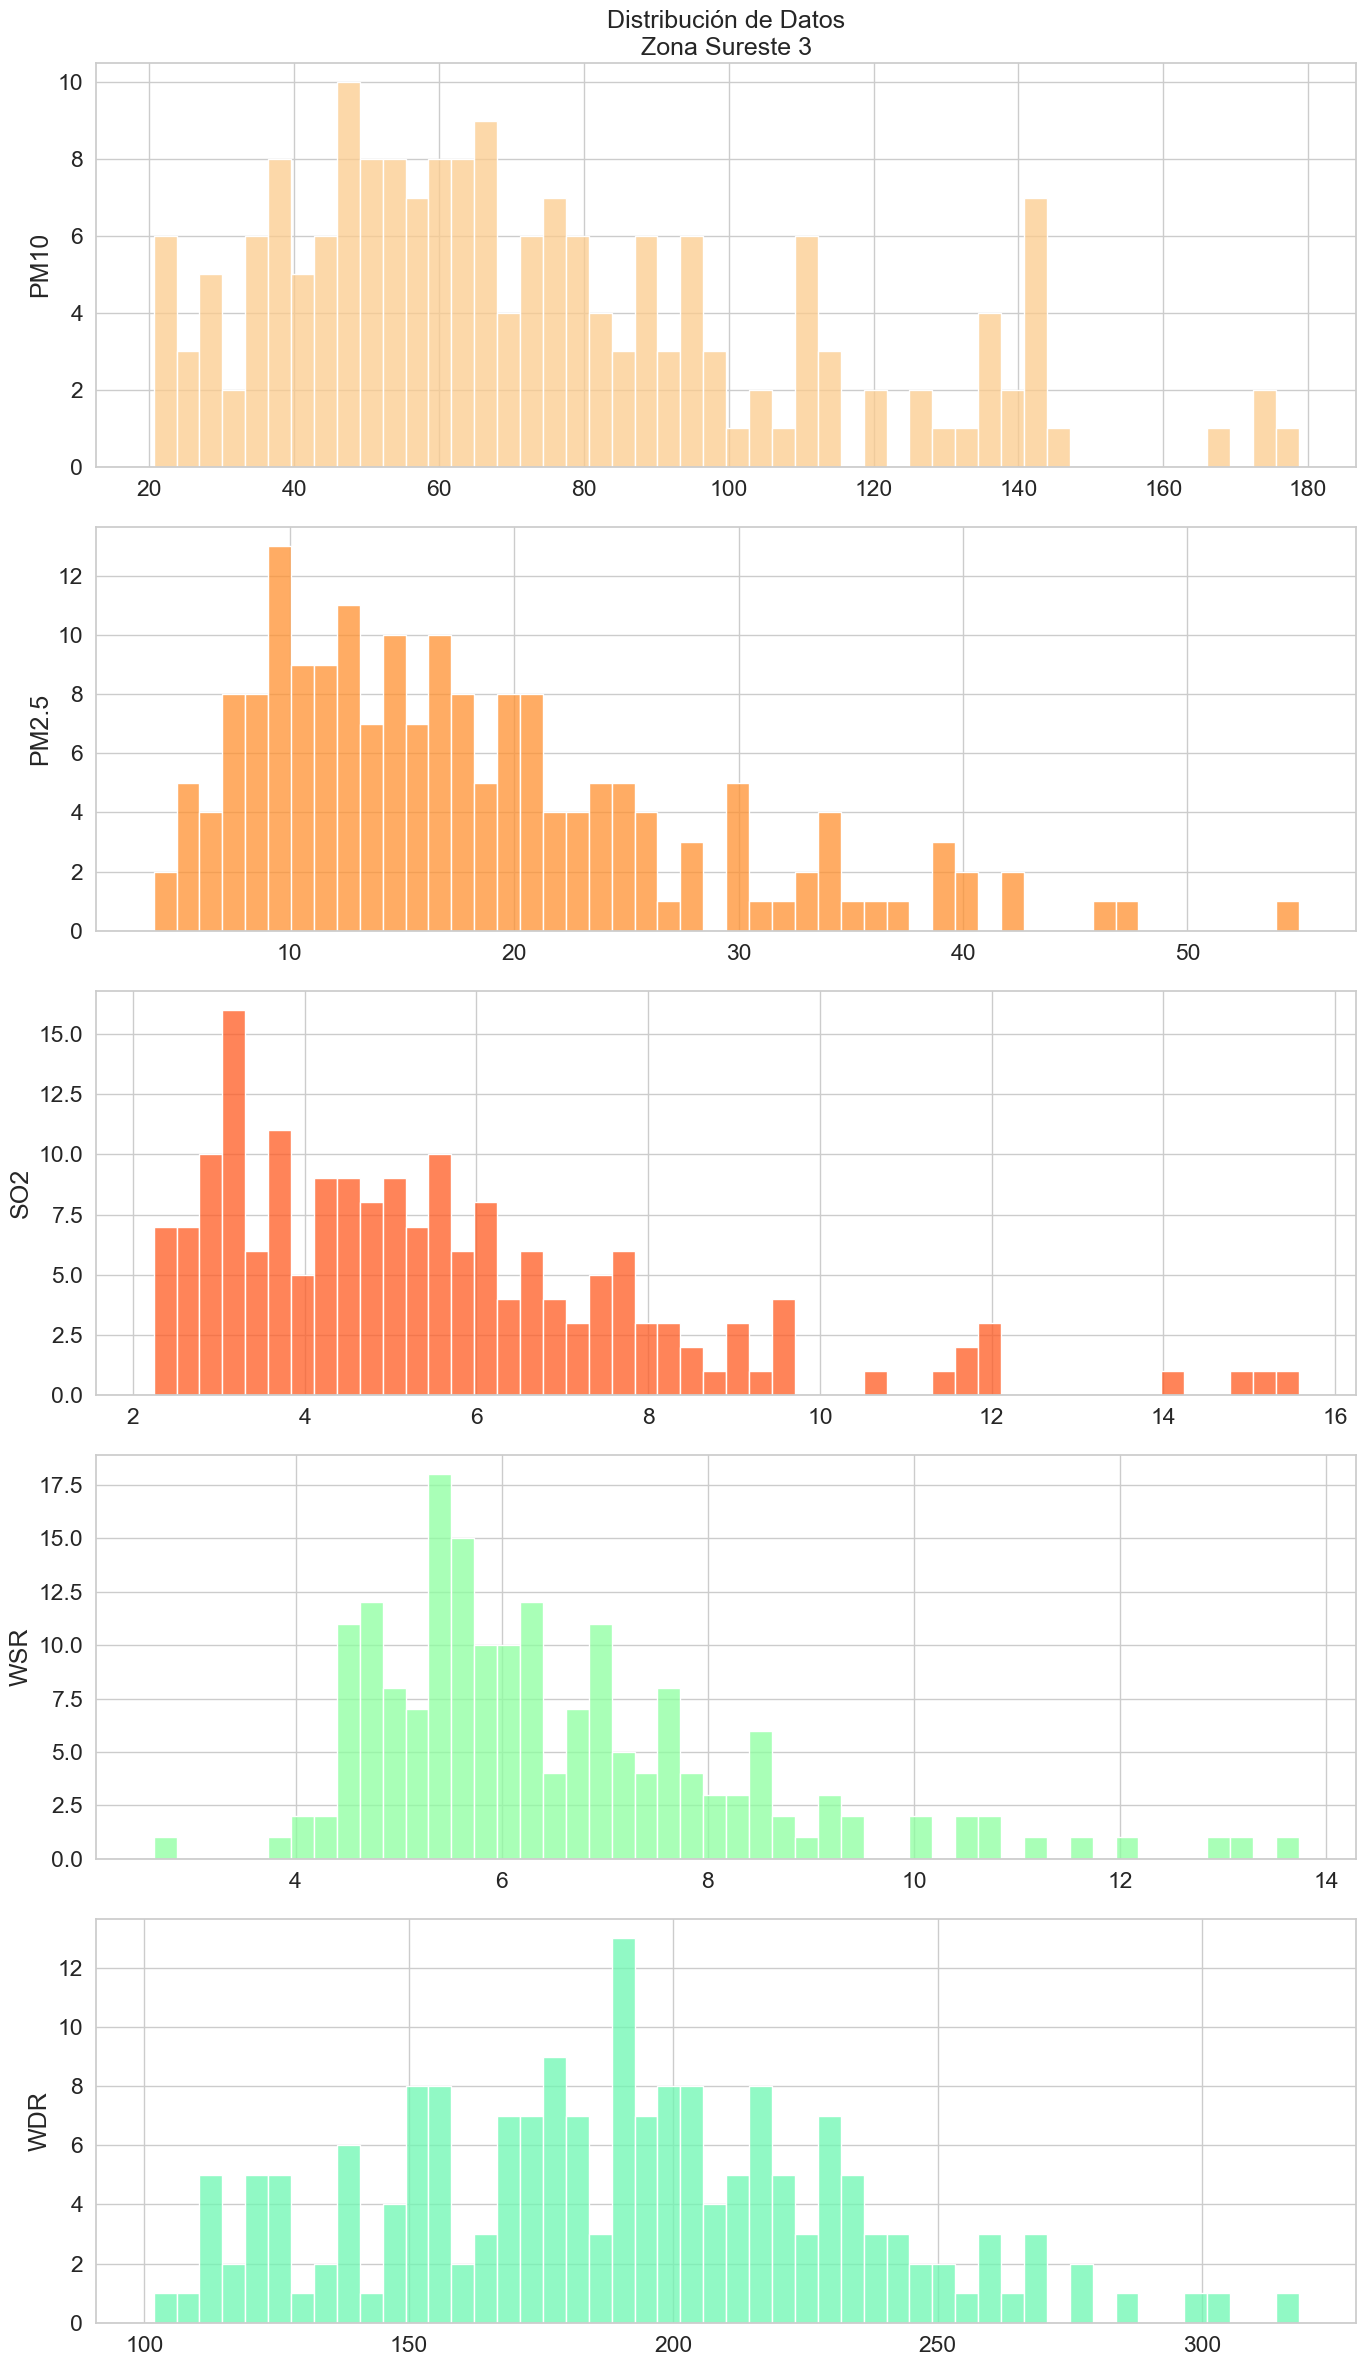

,PM10,PM2.5,SO2,WSR,WDR
Media,73.29,18.07,5.57,6.53,189.25
Desv. Éstandar,35.44,9.63,2.63,1.85,43.29
Min,20.58,3.94,2.24,2.62,101.79
Q1,48.00,10.70,3.57,5.33,156.19
Mediana,66.06,15.93,5.05,6.10,189.58
Q3,92.68,22.72,6.78,7.33,218.36
Max,178.71,54.96,15.58,13.73,318.25
Varianza,1255.95,92.76,6.94,3.43,1874.03
Rango,158.12,51.02,13.34,11.11,216.46


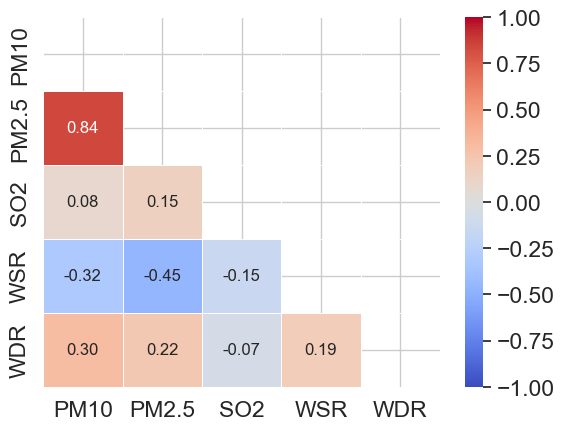

In [67]:
data_exploration(sureste3, "Zona Sureste 3")